In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
diversity = pd.read_csv('diversity_school.csv')

# DIVERSITY EDA

In [5]:
diversity.head(5)

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984


In [6]:
## Number of unique universities before cleaning
diversity['name'].nunique()

4574

In [7]:
## Number of unique categories before cleaning
diversity['category'].nunique()

11

In [8]:
diversity['category'].unique()

array(['Women', 'American Indian / Alaska Native', 'Asian', 'Black',
       'Hispanic', 'Native Hawaiian / Pacific Islander', 'White',
       'Two Or More Races', 'Unknown', 'Non-Resident Foreign',
       'Total Minority'], dtype=object)

In [33]:
## Clean the dataset
diversity_clean = diversity[(diversity['category'] == 'Black') | 
          (diversity['category'] == 'Hispanic') |
          (diversity['category'] == 'American Indian / Alaska Native') |
          (diversity['category'] == 'Asian') |
          (diversity['category'] == 'Native Hawaiian / Pacific Islander') |
          (diversity['category'] == 'White') |
          (diversity['category'] == 'Two Or More Races')]

In [34]:
## Find total enrollment by ethnicity
enrollment_by_ethnicity = diversity_clean.groupby(by=['name'])['enrollment'].agg(['sum']).sort_values(by=['sum'],ascending=False)
enrollment_by_ethnicity.columns=['Total enrollment by ethnicity']
enrollment_by_ethnicity.head(5)

,Total enrollment by ethnicity
name,
University of Phoenix-Arizona,126541
Ivy Tech Community College-Central Indiana,82931
Lone Star College system,65823
Miami Dade College,60731
University of Central Florida,58234


In [35]:
diversity_clean = diversity_clean.merge(enrollment_by_ethnicity, how='left',left_on='name',right_on='name')
diversity_clean.head(5)

,name,total_enrollment,state,category,enrollment,Total enrollment by ethnicity
0,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,126541.0
1,University of Phoenix-Arizona,195059,Arizona,Asian,1959,126541.0
2,University of Phoenix-Arizona,195059,Arizona,Black,31455,126541.0
3,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,126541.0
4,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019,126541.0


In [37]:
diversity_clean['Total enrollment by ethnicity'].describe()

count     32018.000000
mean       3958.824005
std        7139.296160
min           1.000000
25%         354.000000
50%        1246.000000
75%        4151.000000
max      126541.000000
Name: Total enrollment by ethnicity, dtype: float64

In [38]:
diversity_clean['Total enrollment by ethnicity'].quantile(q=0.25)

354.0

In [39]:
diversity_clean = diversity_clean[diversity_clean['Total enrollment by ethnicity']>=diversity_clean['Total enrollment by ethnicity'].quantile(q=0.25)]
diversity_clean

,name,total_enrollment,state,category,enrollment,Total enrollment by ethnicity
0,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,126541.0
1,University of Phoenix-Arizona,195059,Arizona,Asian,1959,126541.0
2,University of Phoenix-Arizona,195059,Arizona,Black,31455,126541.0
3,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,126541.0
4,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019,126541.0
...,...,...,...,...,...,...
24789,Brookline College at Albuquerque,357,New Mexico,Black,10,357.0
24790,Brookline College at Albuquerque,357,New Mexico,Hispanic,265,357.0
24791,Brookline College at Albuquerque,357,New Mexico,Native Hawaiian / Pacific Islander,1,357.0
24792,Brookline College at Albuquerque,357,New Mexico,White,36,357.0


In [40]:
## Number of unique universities after cleaning
diversity_clean['name'].nunique()

3433

<AxesSubplot:xlabel='state'>

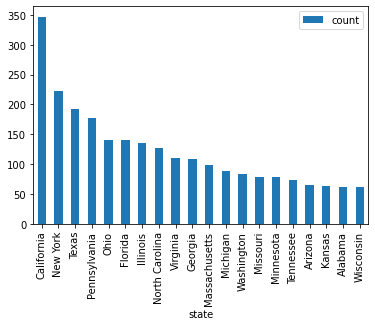

In [41]:
## Top states with most universities
diversity_clean[['state','name']].drop_duplicates().groupby('state')['name'].agg(['count']).sort_values(by='count',ascending=False)[:20].plot(kind='bar')

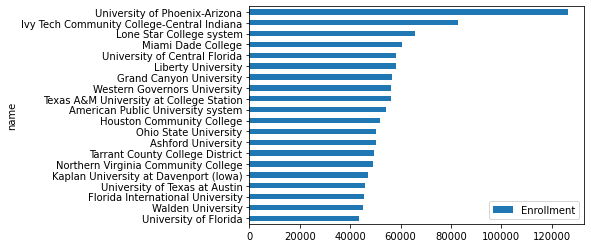

In [42]:
## Top universities interms of enrollment
diversity_clean[['name','Total enrollment by ethnicity']].drop_duplicates().groupby('name')['Total enrollment by ethnicity'].agg(['sum']).sort_values(by='sum',ascending=True)[-20:].plot(kind='barh')
legend(['Enrollment'])

In [43]:
## Top states interms of total enrollment
total_enrollment_states = diversity_clean[['state','name','Total enrollment by ethnicity']].drop_duplicates().groupby('state')['Total enrollment by ethnicity'].agg(['sum']).sort_values(by='sum',ascending=False)
total_enrollment_states.columns=['Total enrollment']
total_enrollment_states[:20]

,Total enrollment
state,
California,2436026.0
Texas,1440719.0
New York,1118999.0
Florida,993018.0
Illinois,725617.0
Pennsylvania,620808.0
Ohio,603516.0
Arizona,554033.0
Michigan,541806.0


In [44]:
diversity_clean['Fraction of enrollment'] = diversity_clean['enrollment'] / diversity_clean['Total enrollment by ethnicity']
diversity_clean

<ipython-input-44-9a38e832d98e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diversity_clean['Fraction of enrollment'] = diversity_clean['enrollment'] / diversity_clean['Total enrollment by ethnicity']


,name,total_enrollment,state,category,enrollment,Total enrollment by ethnicity,Fraction of enrollment
0,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,126541.0,0.006923
1,University of Phoenix-Arizona,195059,Arizona,Asian,1959,126541.0,0.015481
2,University of Phoenix-Arizona,195059,Arizona,Black,31455,126541.0,0.248576
3,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,126541.0,0.110510
4,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019,126541.0,0.008053
...,...,...,...,...,...,...,...
24789,Brookline College at Albuquerque,357,New Mexico,Black,10,357.0,0.028011
24790,Brookline College at Albuquerque,357,New Mexico,Hispanic,265,357.0,0.742297
24791,Brookline College at Albuquerque,357,New Mexico,Native Hawaiian / Pacific Islander,1,357.0,0.002801
24792,Brookline College at Albuquerque,357,New Mexico,White,36,357.0,0.100840


In [45]:
diversity_clean = diversity_clean[['name', 'state','category','enrollment','Total enrollment by ethnicity','Fraction of enrollment']]

In [46]:
diversity_clean_max_fraction = diversity_clean.groupby('name')['Fraction of enrollment'].agg(['max'])
diversity_clean_max_fraction

,max
name,
A.T. Still University of Health Sciences,0.654967
AIB College of Business,0.797557
ASA Institute of Business and Computer Technology,0.458697
ATA College,0.471074
ATS Institute of Technology,0.864333
...,...
York Technical College,0.582453
Young Harris College,0.851142
Youngstown State University,0.797823


### As per a Washington Post article - “A district is considered diverse when no one race constitutes more than 75 percent...”; a college is diverse (1) if all categories have fraction below 0.75, and not diverse (0) otherwise


Article link: https://www.washingtonpost.com/graphics/2019/local/school-diversity-data/

In [47]:
diversity_clean_max_fraction['max']>=0.75
diversity_clean_max_fraction['Diverse?'] = ((diversity_clean_max_fraction['max']<0.75).astype('int'))
diversity_clean_max_fraction = diversity_clean_max_fraction.reset_index()

In [54]:
diversity_final = diversity_clean_max_fraction.merge(diversity_clean,left_on='name',right_on='name',how='inner')
diversity_final

,name,max,Diverse?,state,category,enrollment,Total enrollment by ethnicity,Fraction of enrollment
0,A.T. Still University of Health Sciences,0.654967,1,Missouri,American Indian / Alaska Native,19,3020.0,0.006291
1,A.T. Still University of Health Sciences,0.654967,1,Missouri,Asian,453,3020.0,0.150000
2,A.T. Still University of Health Sciences,0.654967,1,Missouri,Black,170,3020.0,0.056291
3,A.T. Still University of Health Sciences,0.654967,1,Missouri,Hispanic,189,3020.0,0.062583
4,A.T. Still University of Health Sciences,0.654967,1,Missouri,Native Hawaiian / Pacific Islander,10,3020.0,0.003311
...,...,...,...,...,...,...,...,...
24026,Zane State College,0.917245,0,Ohio,Black,110,3456.0,0.031829
24027,Zane State College,0.917245,0,Ohio,Hispanic,14,3456.0,0.004051
24028,Zane State College,0.917245,0,Ohio,Native Hawaiian / Pacific Islander,1,3456.0,0.000289
24029,Zane State College,0.917245,0,Ohio,White,3170,3456.0,0.917245


In [55]:
diversity_final = diversity_final[['state','name','Diverse?']]
diversity_final = diversity_final.drop_duplicates()
diversity_final

,state,name,Diverse?
0,Missouri,A.T. Still University of Health Sciences,1
7,Iowa,AIB College of Business,0
14,New York,ASA Institute of Business and Computer Technology,1
21,Kentucky,ATA College,1
28,Ohio,ATS Institute of Technology,0
...,...,...,...
23996,South Carolina,York Technical College,1
24003,Georgia,Young Harris College,0
24010,Ohio,Youngstown State University,0
24017,California,Yuba College,1


In [56]:
## Number of diverse colleges
diversity_final['Diverse?'].value_counts()

1    2056
0    1377
Name: Diverse?, dtype: int64

In [57]:
2056/3433

0.5988930964171278

 ## Of the 3433 colleges in the analysis, 59.8% are considered diverse based on this consideration.

In [58]:
diversity_final = diversity_final.groupby('state')['Diverse?'].agg(['mean'])
diversity_final = diversity_final.reset_index()
diversity_final.columns=['state','fraction_of_diverse_colleges']
diversity_final

,state,fraction_of_diverse_colleges
0,Alabama,0.548387
1,Alaska,1.000000
2,Arizona,0.938462
3,Arkansas,0.444444
4,California,0.953890
5,Colorado,0.709677
6,Connecticut,0.769231
7,Delaware,0.818182
8,Florida,0.815603
9,Georgia,0.651376


# EDA - ETHNICITY

In [59]:
diversity_clean.groupby('category')['enrollment'].agg(['sum']).sort_values(by='sum',ascending=False)

,sum
category,
White,10424058
Hispanic,3002487
Black,2559553
Asian,1139381
Two Or More Races,587458
American Indian / Alaska Native,139829
Native Hawaiian / Pacific Islander,53970


In [65]:
total_white_enrollment_states = diversity_clean[diversity_clean['category']=='White'].groupby('state')['enrollment'].agg(['sum']).sort_values(by='sum',ascending=False)
total_white_enrollment_states.columns=['Total White enrollment']


In [66]:
total_black_enrollment_states = diversity_clean[diversity_clean['category']=='Black'].groupby('state')['enrollment'].agg(['sum']).sort_values(by='sum',ascending=False)
total_black_enrollment_states.columns=['Total Black enrollment']


In [67]:
total_hispanic_enrollment_states = diversity_clean[diversity_clean['category']=='Hispanic'].groupby('state')['enrollment'].agg(['sum']).sort_values(by='sum',ascending=False)
total_hispanic_enrollment_states.columns=['Total Hispanic enrollment']


In [68]:
total_asian_enrollment_states = diversity_clean[diversity_clean['category']=='Asian'].groupby('state')['enrollment'].agg(['sum']).sort_values(by='sum',ascending=False)
total_asian_enrollment_states.columns=['Total Asian enrollment']


In [69]:
total_enrollment_merged = total_enrollment_states.merge(total_white_enrollment_states,on='state').merge(total_black_enrollment_states,on='state').merge(total_hispanic_enrollment_states,on='state').merge(total_asian_enrollment_states,on='state')
total_enrollment_merged

,Total enrollment,Total White enrollment,Total Black enrollment,Total Hispanic enrollment,Total Asian enrollment
state,,,,,
California,2436026.0,792128,183585,945062,378255
Texas,1440719.0,593374,200640,519294,83218
New York,1118999.0,603416,171591,201210,110494
Florida,993018.0,476058,195894,254240,33158
Illinois,725617.0,430639,106144,121450,46944
Pennsylvania,620808.0,452934,72816,42671,34082
Ohio,603516.0,470483,77054,21443,15357
Arizona,554033.0,289781,73823,121974,19709
Michigan,541806.0,401627,76189,23735,20872


In [70]:
total_enrollment_merged["Total White enrollment"] = total_enrollment_merged.apply(lambda row: (row["Total White enrollment"]/row["Total enrollment"]), axis =1)
total_enrollment_merged["Total Black enrollment"] = total_enrollment_merged.apply(lambda row: (row["Total Black enrollment"]/row["Total enrollment"]), axis =1)
total_enrollment_merged["Total Hispanic enrollment"] = total_enrollment_merged.apply(lambda row: (row["Total Hispanic enrollment"]/row["Total enrollment"]), axis =1)
total_enrollment_merged["Total Asian enrollment"] = total_enrollment_merged.apply(lambda row: (row["Total Asian enrollment"]/row["Total enrollment"]), axis =1)

In [71]:
total_enrollment_merged.sort_values(by='Total Asian enrollment',ascending=False)[:5][['Total Asian enrollment']]

,Total Asian enrollment
state,
Hawaii,0.326103
California,0.155275
Nevada,0.103054
New York,0.098744
Washington,0.096259


In [72]:
total_enrollment_merged.sort_values(by='Total White enrollment',ascending=False)[:5][['Total White enrollment']]

,Total White enrollment
state,
Maine,0.881789
North Dakota,0.862939
Vermont,0.860663
Wyoming,0.856300
Montana,0.847202


In [73]:
total_enrollment_merged.sort_values(by='Total Hispanic enrollment',ascending=False)[:5][['Total Hispanic enrollment']]

,Total Hispanic enrollment
state,
New Mexico,0.466385
California,0.387952
Texas,0.360441
Florida,0.256028
Nevada,0.237003


In [74]:
total_enrollment_merged.sort_values(by='Total Black enrollment',ascending=False)[:5][['Total Black enrollment']]

,Total Black enrollment
state,
Mississippi,0.385650
Georgia,0.337559
Louisiana,0.314098
Maryland,0.294752
Alabama,0.283770
